<a href="https://colab.research.google.com/github/natalia973/Data-Science-Data-Analytics/blob/main/Anova_An%C3%A1lise_de_Vari%C3%A2ncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anova - Análise de Variância:


*  Teste de Hipótese

*  Usada para comparar três ou mais grupos

*   Possui uma variável quantitativa e uma ou mais variáveis categóricas
*   Em vez de comparações em pares de grupos, olha todo o conjunto


*   Busca a variação entre os grupos comparado á variação "dentro" dos grupos


*  




In [1]:
#Verificar se existe diferença significativa no tempo que o remédio demorou para fazer efeito.
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison


In [3]:
tratamento = pd.read_csv("/content/anova.csv" , sep = ";")
tratamento

,Sexo,Remedio,Horas
0,F,A,5
1,F,A,10
2,F,A,7
3,F,A,7
4,M,A,7
5,M,A,6
6,M,A,9
7,M,A,9
8,F,B,5
9,F,B,5


<Axes: title={'center': 'Horas'}, xlabel='[Remedio]'>

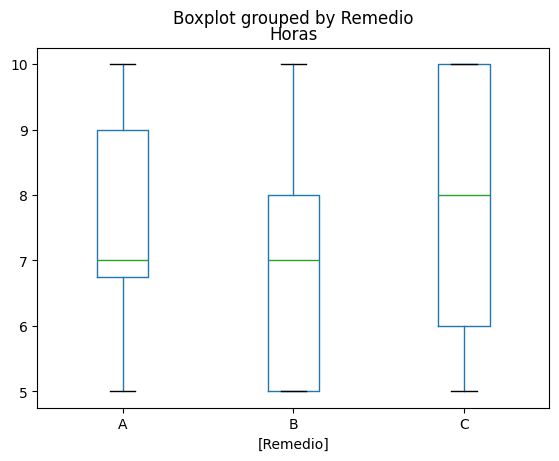

In [4]:
tratamento.boxplot(by = "Remedio" , grid = False)

In [6]:
modelo1 = ols('Horas ~ Remedio' ,  data = tratamento).fit()
resultado1 = sm.stats.anova_lm(modelo1)
resultado1
# Observar o valor de p maior que 0,05 => Hipótese é nula e não há diferença significativa.

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.537618,0.591966
Residual,21.0,79.750000,3.797619,NaN,NaN


In [7]:
# Checar se há variação no tempo de ação do remédio em pessoas de sexo diferente
modelo2 = ols('Horas ~ Remedio * Sexo' , data = tratamento).fit()
resultado2 = sm.stats.anova_lm(modelo2)
resultado2
# Nenhum valor de p mostra diferença significativa ,  não se rejeita hipótese nula

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.532609,0.596042
Sexo,1.0,4.166667,4.166667,1.086957,0.310948
Remedio:Sexo,2.0,6.583333,3.291667,0.858696,0.440360
Residual,18.0,69.000000,3.833333,NaN,NaN


In [9]:
# Se houver diferença o teste de turkey é executado
# Excecução do teste do turkey e visualização dos gráficos com os resultado
mc = MultiComparison(tratamento['Horas'] , tratamento['Remedio'])
resultado_teste = mc.tukeyhsd()
print(resultado_teste)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper reject
-------------------------------------------------
     A      B   -0.625 0.7991 -3.081 1.831  False
     A      C    0.375 0.9219 -2.081 2.831  False
     B      C      1.0 0.5689 -1.456 3.456  False
-------------------------------------------------


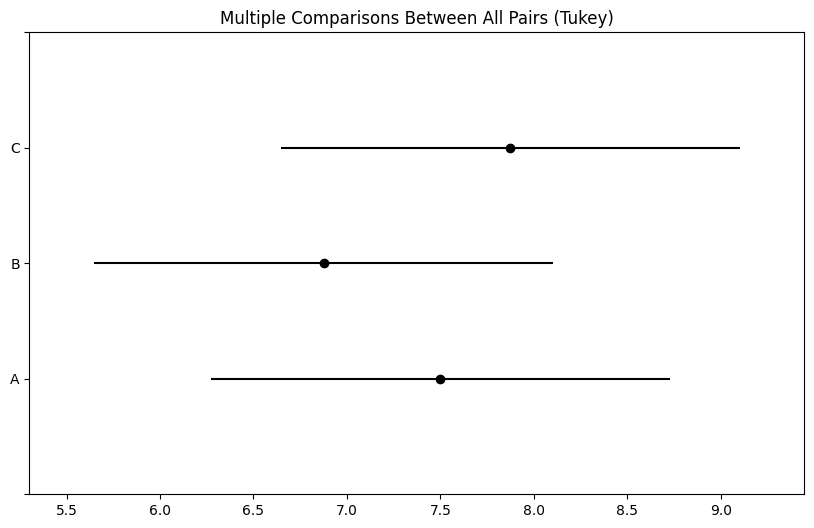

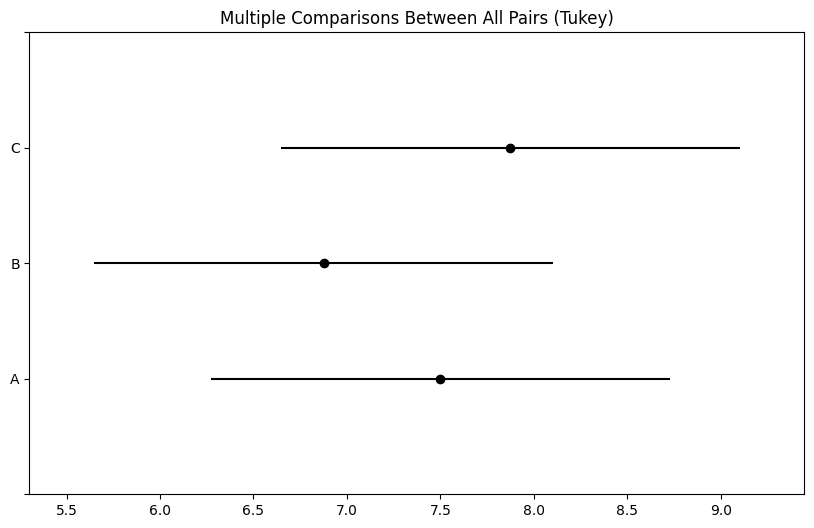

In [10]:
resultado_teste.plot_simultaneous()